In [1]:
import pandas as pd
import sys
import matplotlib

In [2]:
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 2.7.11 |Anaconda custom (x86_64)| (default, Dec  6 2015, 18:57:58) 
[GCC 4.2.1 (Apple Inc. build 5577)]
Pandas version 0.16.2
Matplotlib version 1.4.3


In [3]:
names = ['Bob','Jessica','Mary','John','Mel']
births = [968, 155, 77, 578, 973]

In [4]:
zip(names, births)

[('Bob', 968), ('Jessica', 155), ('Mary', 77), ('John', 578), ('Mel', 973)]

In [5]:
BabyDataSet = list (zip(names, births))
df = pd.DataFrame(data = BabyDataSet, columns=['Names', 'Births'])

In [6]:
df

,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


In [7]:
water23 = pd.read_csv("../data/waterlevel/Water23.csv", index_col='date')

In [8]:
water23

,upperlevel,downlevel
date,,
2015-01-16 15:50:00,35.51,19.60
2015-01-16 16:00:00,35.51,19.61
2015-01-16 16:10:00,35.50,19.61
2015-01-16 17:00:00,35.55,19.67
2015-01-16 18:00:00,35.54,19.72
2015-01-16 19:00:00,35.53,19.78
2015-01-16 20:00:00,35.53,19.83
2015-01-16 21:00:00,35.52,19.87
2015-01-16 22:00:00,35.51,19.92


In [10]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


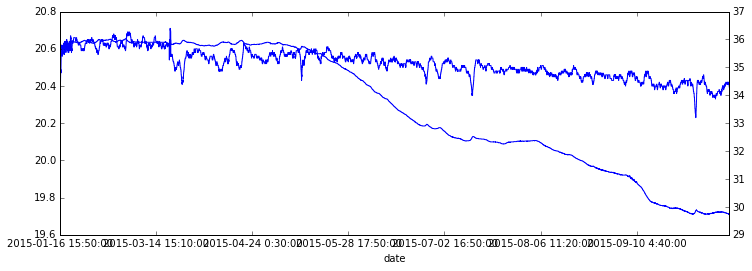

In [11]:
# water23['upperlevel'].plot()
fig = plt.figure(figsize=(12,4))
ax1 = plt.subplot(111)
water23['downlevel'].plot(ax=ax1)
ax1_1 = ax1.twinx()
water23['upperlevel'].plot(ax=ax1_1)

In [12]:
climate = pd.read_csv("../data/waterlevel/ClimateWater.csv", index_col='date')

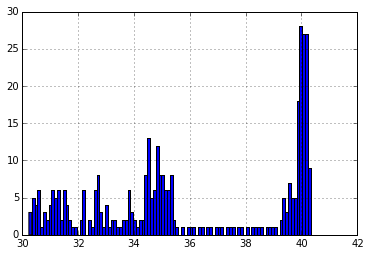

In [13]:
climate["WaterH1"].hist(bins=100)

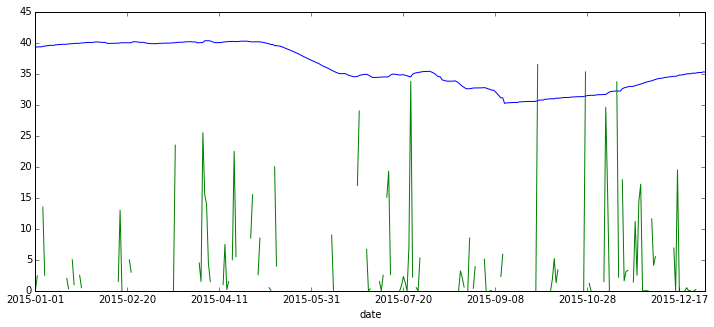

In [21]:
climate["WaterH1"].plot(figsize=(12,5))
climate["Rainfall(mm)"].plot(figsize=(12,5))

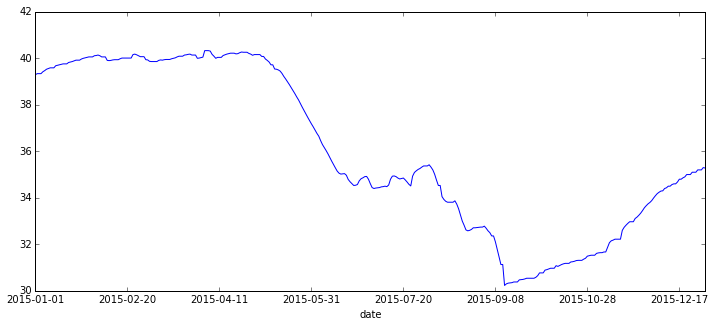

In [22]:
climate["WaterH1"].plot(figsize=(12,5))

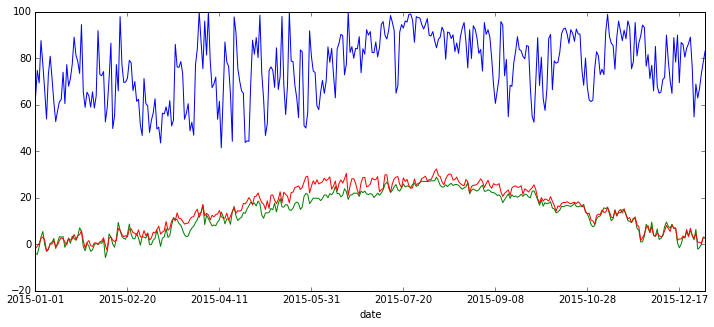

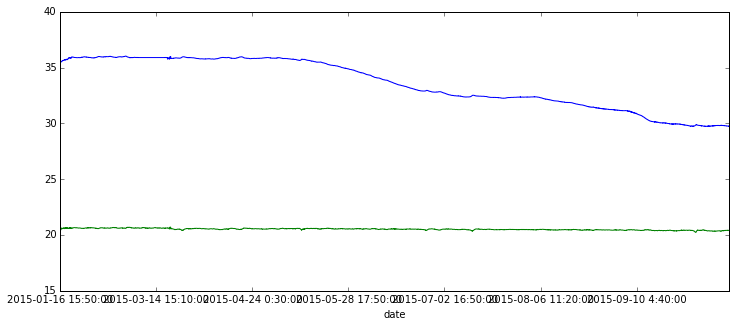

In [24]:
water23['upperlevel'].plot(figsize=(12,5))
water23['downlevel'].plot()

In [34]:
newindex = []
for ind in water23.index:
    newindex.append(ind.split()[0])

In [35]:
vals, inds = np.unique(newindex, return_inverse=True)

In [36]:
upperh = np.ones(vals.size)*np.nan
downh = np.ones(vals.size)*np.nan
for i in range (vals.size):
    active = inds==i
    upperh[i] = water23["upperlevel"].values[active].sum() / active.sum()
    downh[i] = water23["downlevel"].values[active].sum() / active.sum()

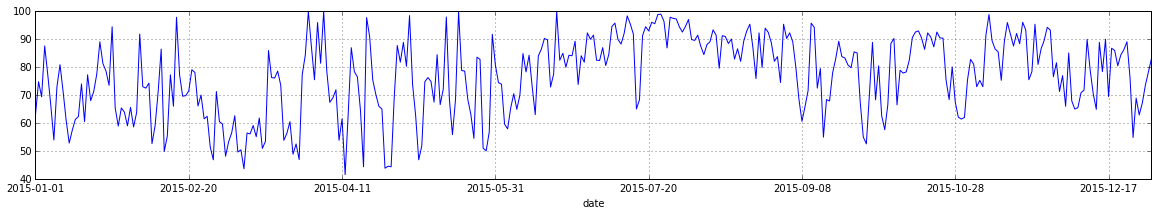

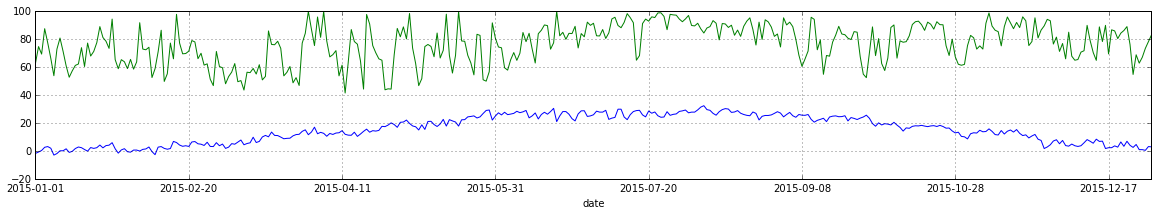

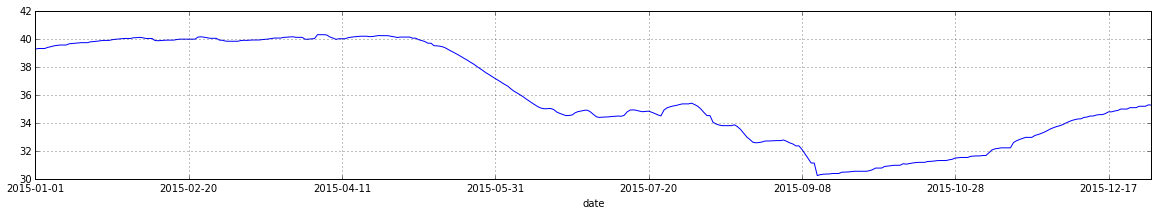

In [61]:
climate["WaterH1"].plot(figsize=(20,3))
grid(True)

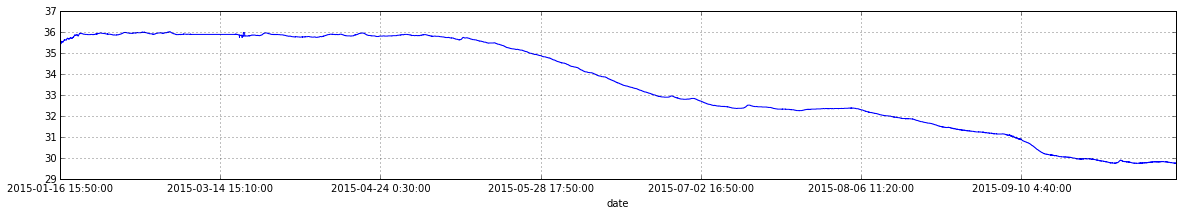

In [51]:
water23['upperlevel'].plot(figsize=(20,3))
grid(True)

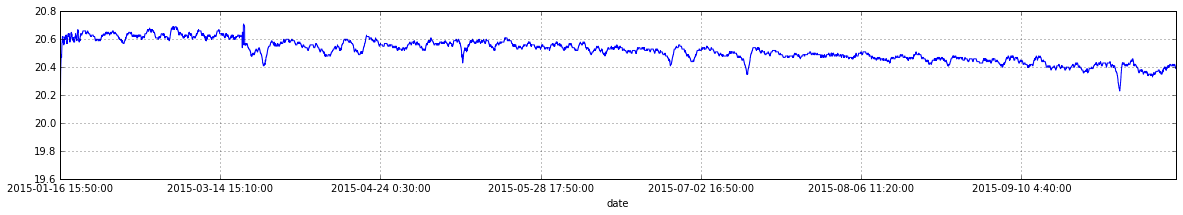

In [52]:
water23['downlevel'].plot(figsize=(20,3))
grid(True)

In [68]:
climate.keys()

Index([u'Temp(��C)', u'Rainfall(mm)', u'Moisture(%)', u'SurfaceTemp(��C)',
       u'WaterH1'],
      dtype='object')

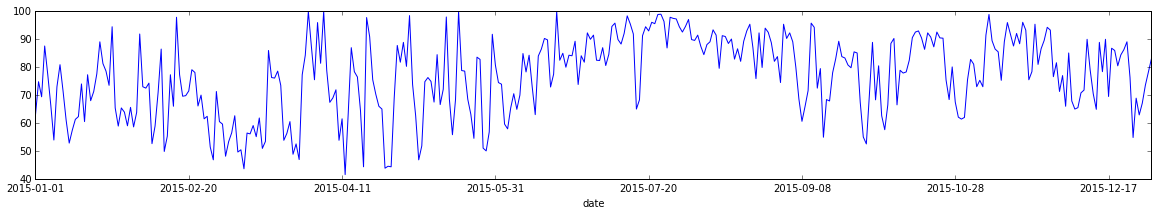

In [80]:
climate["Moisture(%)"].plot(figsize=(20,3))


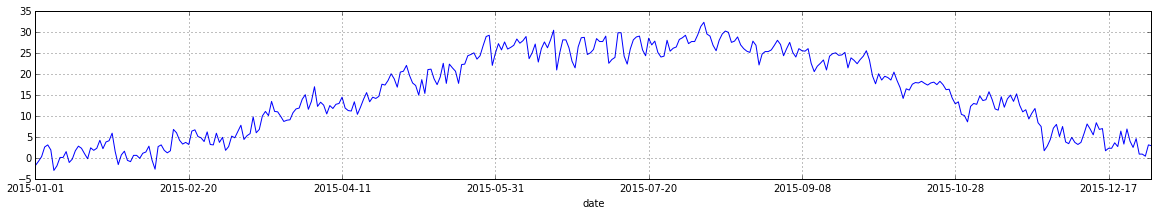

In [81]:
climate["SurfaceTemp(\xa1\xc6C)"].plot(figsize=(20,3))
grid(True)

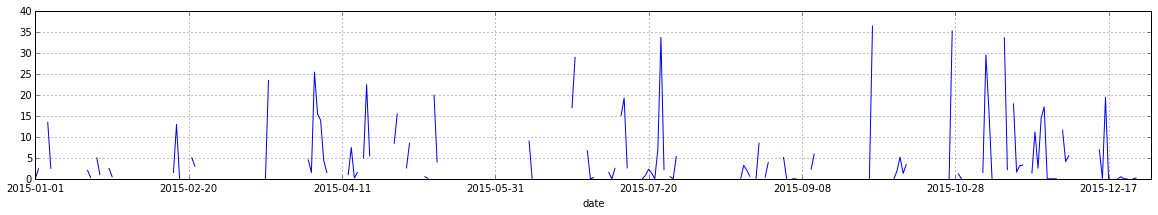

In [79]:
climate["Rainfall(mm)"].plot(figsize=(20,3))
grid(True)

In [ ]:
climate["Rainfall(mm)"].plot(figsize=(20,3)).bar

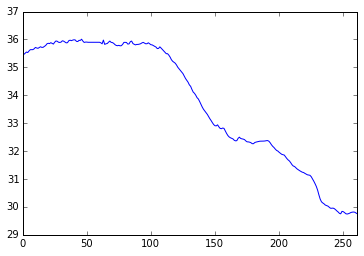

In [57]:
df['upperH'].plot(by)

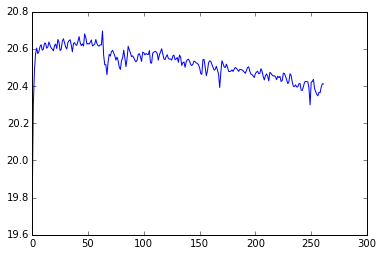

In [38]:
plt.plot(downh)

In [59]:
waterdataset = list (zip(vals, upperh, downh))
df = pd.DataFrame(data = waterdataset, columns=['date', 'upperH', 'downH'])

In [56]:
df

,date,upperH,downH
0,2015-01-16,35.520000,19.757000
1,2015-01-17,35.466250,20.292917
2,2015-01-18,35.507083,20.481250
3,2015-01-19,35.550000,20.572917
4,2015-01-20,35.532083,20.604167
5,2015-01-21,35.588750,20.574167
6,2015-01-22,35.635000,20.585000
7,2015-01-23,35.634167,20.612500
8,2015-01-24,35.636250,20.622083
9,2015-01-25,35.666667,20.592500
